In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets

In [3]:
customers_file = "data\Customers.csv"
products_file = "data\Products.csv"
transactions_file = "data\Transactions.csv"

In [4]:
customers_df = pd.read_csv(customers_file)
products_df = pd.read_csv(products_file)
transactions_df = pd.read_csv(transactions_file)

# Convert TransactionDate to datetime format

In [5]:
transactions_df["TransactionDate"] = pd.to_datetime(transactions_df["TransactionDate"])


# Add derived columns for analysis

In [6]:
transactions_df["Month"] = transactions_df["TransactionDate"].dt.to_period("M")
transactions_df["Year"] = transactions_df["TransactionDate"].dt.year


# Merge datasets for deeper analysis

In [7]:
merged_df = transactions_df.merge(customers_df, on="CustomerID", how="left")
merged_df = merged_df.merge(products_df, on="ProductID", how="left")


# Exploratory Data Analysis

# 1. Check for missing values

In [8]:
print("Missing Values:")
print("Customers:")
print(customers_df.isnull().sum())
print("Products:")
print(products_df.isnull().sum())
print("Transactions:")
print(transactions_df.isnull().sum())

Missing Values:
Customers:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Products:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Transactions:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
Month              0
Year               0
dtype: int64


# 2. Check for duplicates

In [9]:
print("\nDuplicate Rows:")
print("Customers:", customers_df.duplicated().sum())
print("Products:", products_df.duplicated().sum())
print("Transactions:", transactions_df.duplicated().sum())


Duplicate Rows:
Customers: 0
Products: 0
Transactions: 0


# 3. Summary statistics

In [10]:
print("\nSummary Statistics:")
print("Transactions:")
print(transactions_df.describe(include="all"))
print("Products:")
print(products_df.describe(include="all"))
print("Customers:")
print(customers_df.describe(include="all"))


Summary Statistics:
Transactions:
       TransactionID CustomerID ProductID                TransactionDate  \
count           1000       1000      1000                           1000   
unique          1000        199       100                            NaN   
top           T00001      C0109      P059                            NaN   
freq               1         11        19                            NaN   
mean             NaN        NaN       NaN  2024-06-23 15:33:02.768999936   
min              NaN        NaN       NaN            2023-12-30 15:29:12   
25%              NaN        NaN       NaN     2024-03-25 22:05:34.500000   
50%              NaN        NaN       NaN     2024-06-26 17:21:52.500000   
75%              NaN        NaN       NaN            2024-09-19 14:19:57   
max              NaN        NaN       NaN            2024-12-28 11:00:00   
std              NaN        NaN       NaN                            NaN   

           Quantity   TotalValue       Price    Mont

# 4. Visualizations

# Sales trend over time

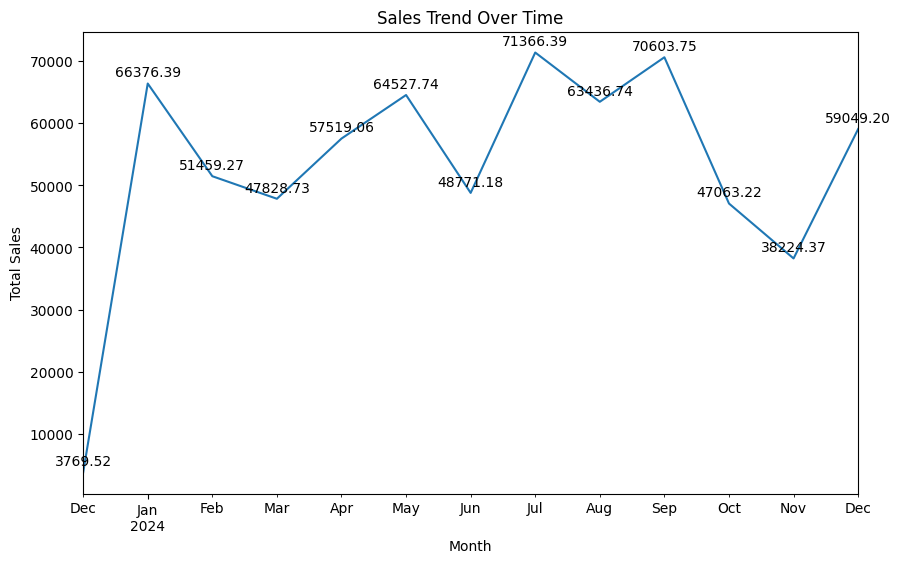

In [ ]:
sales_trend = merged_df.groupby("Month")["TotalValue"].sum()

plt.figure(figsize=(10, 6))
sales_trend.plot(kind="line", title="Sales Trend Over Time", ylabel="Total Sales", xlabel="Month")

for month, total_sales in sales_trend.items():
    plt.annotate(
        f"{total_sales:.2f}", 
        (month, total_sales),  
        textcoords="offset points",  
        xytext=(0, 5),  
        ha="center" 
    )

plt.show()


# Top products by sales

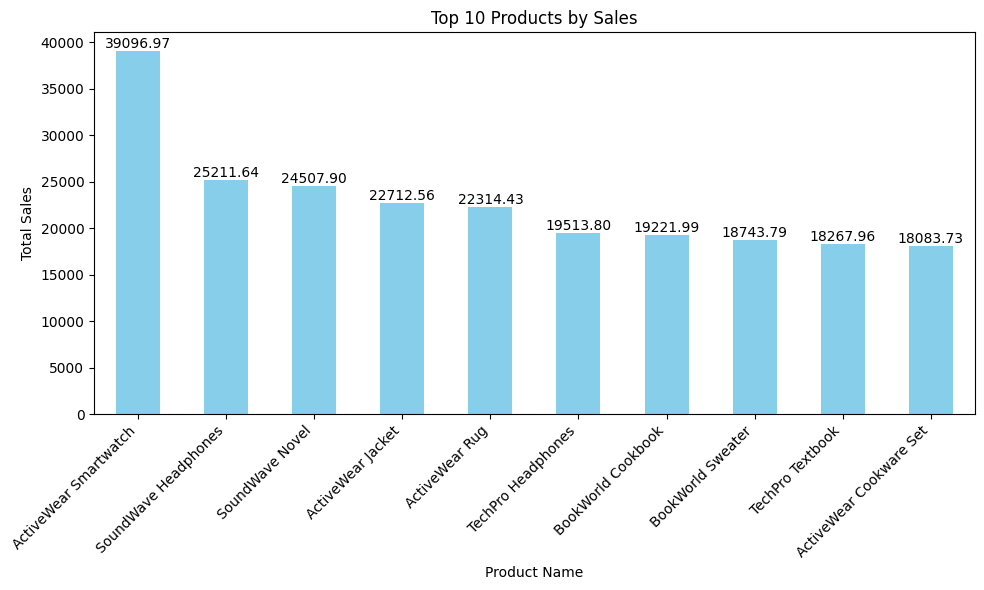

In [17]:
top_products = merged_df.groupby("ProductName")["TotalValue"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
bars = top_products.plot(
    kind="bar",
    title="Top 10 Products by Sales",
    ylabel="Total Sales",
    xlabel="Product Name",
    color="skyblue",
)


for index, value in enumerate(top_products):
    plt.text(
        index,  
        value,  
        f"{value:.2f}",  
        ha="center",  
        va="bottom",  
        fontsize=10  
    )

plt.xticks(rotation=45, ha="right")  
plt.tight_layout()  
plt.show()


# Region-wise sales analysis

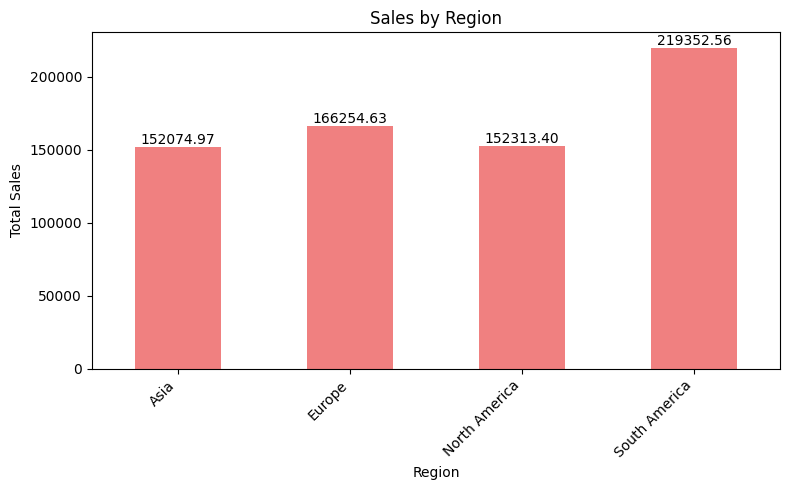

In [18]:
region_sales = merged_df.groupby("Region")["TotalValue"].sum()

plt.figure(figsize=(8, 5))
bars = region_sales.plot(
    kind="bar",
    title="Sales by Region",
    ylabel="Total Sales",
    xlabel="Region",
    color="lightcoral"
)

for index, value in enumerate(region_sales):
    plt.text(
        index,  
        value,  
        f"{value:.2f}",  
        ha="center",  
        va="bottom",  
        fontsize=10  
    )

plt.xticks(rotation=45, ha="right")  
plt.tight_layout()  
plt.show()


# Top customers by spending

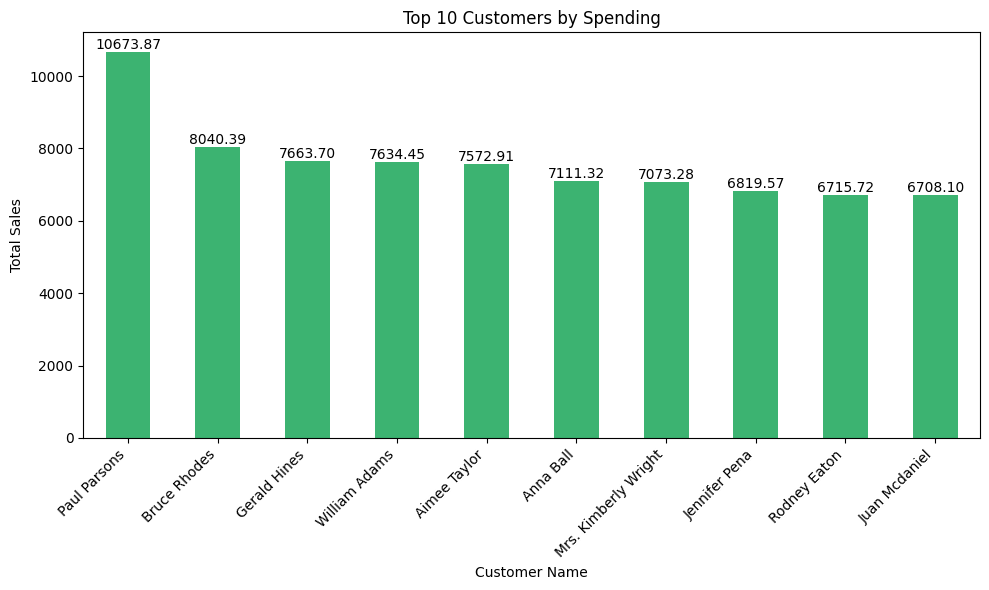

In [19]:
top_customers = merged_df.groupby("CustomerName")["TotalValue"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
bars = top_customers.plot(
    kind="bar",
    title="Top 10 Customers by Spending",
    ylabel="Total Sales",
    xlabel="Customer Name",
    color="mediumseagreen"
)

for index, value in enumerate(top_customers):
    plt.text(
        index, 
        value,  
        f"{value:.2f}", 
        ha="center", 
        va="bottom",  
        fontsize=10  
    )

plt.xticks(rotation=45, ha="right")  
plt.tight_layout()  
plt.show()


# Category-wise sales

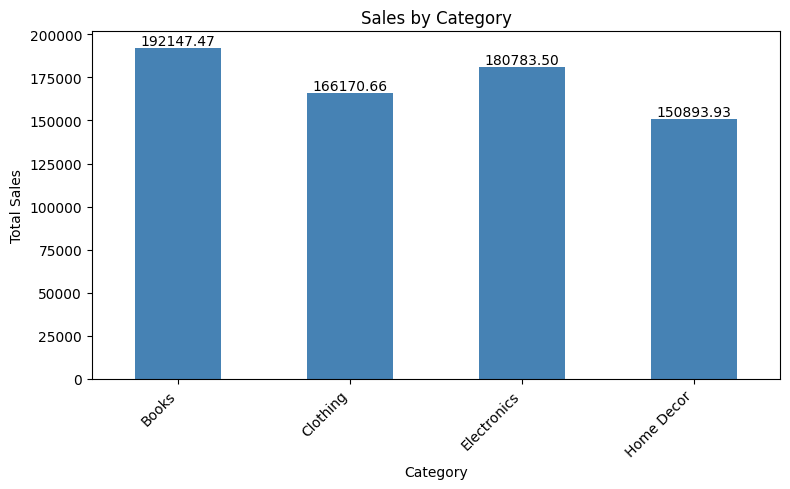

In [20]:
category_sales = merged_df.groupby("Category")["TotalValue"].sum()

plt.figure(figsize=(8, 5))
bars = category_sales.plot(
    kind="bar",
    title="Sales by Category",
    ylabel="Total Sales",
    xlabel="Category",
    color="steelblue"
)


for index, value in enumerate(category_sales):
    plt.text(
        index, 
        value,  
        f"{value:.2f}",  
        ha="center",  
        va="bottom", 
        fontsize=10 
    )

plt.xticks(rotation=45, ha="right")  
plt.tight_layout() 
plt.show()
